In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import json

In [45]:
# Transforming the lines into a matrix 4214 vectors X 4096 features
def read_dataset(route):
    dataset = open(route,"r")
    matrix = []
    img_ids = []
    for data_line in dataset.readlines():
        data_line = data_line.strip()
        id_line = data_line
        # Obtengo vectores
        data_line = data_line[data_line.find("["):]
        matrix.append(json.loads(data_line))
        # Obtengo id
        img_id = id_line[14:19]
        img_ids.append(img_id)
        
    return (img_ids, np.asarray(matrix))

In [30]:
def pca_reduction(dataset, n_components):
    pca = PCA(n_components=n_components)
    rpm = pca.fit_transform(dataset) #reduced pca matrix
    return rpm

In [31]:
def kmeans(dataset, clusters):
    my_kmeans = KMeans(n_clusters=clusters)
    my_kmeans.fit(dataset)
    return my_kmeans

In [32]:
def ms(dataset):
    my_ms = MeanShift()
    my_ms.fit(dataset)
    return my_ms

In [33]:
def db(dataset, eps, min_samples):
    my_db = DBSCAN(eps=eps, min_samples=min_samples)
    my_db.fit(dataset)
    return my_db

In [34]:
def TS(dataset, n_components, perplexity):
    my_ts = TSNE(n_components=n_components, perplexity=perplexity)
    reduction = my_ts.fit_transform(dataset)
    return reduction

In [35]:
# PCA
dataset = read_dataset("byArtworkID/dataset.txt")[1]
rpm = pca_reduction(dataset, 50)

In [36]:
# KMeans
my_kmeans10 = kmeans(rpm, 10)
km_centers10 = my_kmeans10.cluster_centers_
km_labels10 = my_kmeans10.labels_

my_kmeans20 = kmeans(rpm, 10)
km_centers20 = my_kmeans20.cluster_centers_
km_labels20 = my_kmeans20.labels_

my_kmeans30 = kmeans(rpm, 10)
km_centers30 = my_kmeans30.cluster_centers_
km_labels30 = my_kmeans30.labels_

In [37]:
# MeanShift
my_ms = ms(rpm)
ms_centers = my_ms.cluster_centers_
ms_labels = my_ms.labels_

In [38]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# DBSCAN
my_db_default = db(rpm, 0.5, 5)
components_default = my_db_default.components_
n_clusters_default = len(set(my_db_default.labels_)) - (1 if -1 in my_db_default.labels_ else 0)

my_db_1 = db(rpm, 0.5, 2)
components_1 = my_db_1.components_
n_clusters_1 = len(set(my_db_1.labels_)) - (1 if -1 in my_db_1.labels_ else 0)

my_db_2 = db(rpm, 150, 4)
components_2 = my_db_2.components_
n_clusters_2 = len(set(my_db_2.labels_)) - (1 if -1 in my_db_2.labels_ else 0)

In [39]:
ts_reduced = TS(rpm, 2, 50)

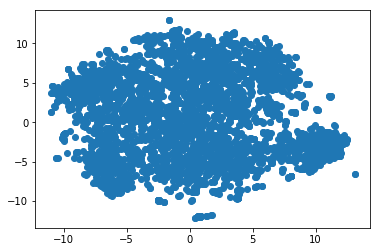

In [40]:
plt.plot(ts_reduced[:, 0], ts_reduced[:, 1], 'o')

In [41]:
l1 = [1,2,3]
l2 = [4,5,6]

In [42]:
"hola"[1:3]

'ol'

In [49]:
ids = read_dataset("byArtworkID/dataset.txt")[0]
labels = ms_labels
positions = ts_reduced

In [51]:
data = []
for i in range(0, len(ids)-1):
    img_id = ids[i]
    x = positions[i][0]
    y = positions[i][1]
    label = labels[i]
    data.append([img_id, x, y, label])
    
df = pd.DataFrame(data = data, columns=['Names', 'x', 'y', 'label'])
df
    


,Names,x,y,label
0,10000,-8.080248,-4.518840,0
1,10011,3.315147,5.379663,0
2,10087,-6.551675,-5.354921,0
3,10096,-5.991772,1.150400,0
4,10126,1.264684,4.571614,0
5,10156,9.421240,-4.081161,0
6,10158,4.888081,3.422297,0
7,10214,4.172931,3.134250,0
8,10314,-7.410735,-5.920331,0
9,10339,-7.233480,-3.724484,0


In [52]:
"./byArtworkID/9992.jpg:[".find("ol")

1